In [2]:
#importing libraries
import numpy as np 

%matplotlib inline 
import matplotlib.pyplot as plt 
import os 
from keras import layers 
from keras.models import Model
from keras.models import load_model
from keras import callbacks 
import cv2 
import string

In [4]:
#print images in dataset
os.listdir("captcha_dataset\samples")

['226md.png',
 '22d5n.png',
 '2356g.png',
 '23mdg.png',
 '23n88.png',
 '243mm.png',
 '244e2.png',
 '245y5.png',
 '24f6w.png',
 '24pew.png',
 '25257.png',
 '253dc.png',
 '25egp.png',
 '25m6p.png',
 '25p2m.png',
 '25w53.png',
 '264m5.png',
 '268g2.png',
 '28348.png',
 '28x47.png',
 '2b827.png',
 '2bg48.png',
 '2cegf.png',
 '2cg58.png',
 '2cgyx.png',
 '2en7g.png',
 '2enf4.png',
 '2fxgd.png',
 '2g783.png',
 '2g7nm.png',
 '2gyb6.png',
 '2mg87.png',
 '2mpnn.png',
 '2n73f.png',
 '2nbc5.jpg',
 '2nbcx.png',
 '2nf26.png',
 '2npg6.png',
 '2nx38.png',
 '2p2y8.png',
 '2pfpn.png',
 '2w4y7.png',
 '2wc38.png',
 '2wx73.png',
 '2x7bm.png',
 '2xc2n.png',
 '2ycn8.png',
 '2yggg.png',
 '325fb.png',
 '32cnn.png',
 '32dnn.png',
 '33b22.png',
 '33f7m.png',
 '33n73.png',
 '33ng4.png',
 '33p4e.png',
 '34b84.png',
 '34fxm.png',
 '34pcn.png',
 '368y5.png',
 '36bc2.png',
 '36nx4.png',
 '36w25.png',
 '373gb.png',
 '377xx.png',
 '378e5.png',
 '37d52.png',
 '37ep6.png',
 '387g2.png',
 '38n57.png',
 '3b4we.png',
 '3bd8

In [5]:
#total no of images in dataset
n=len(os.listdir("captcha_dataset\samples"))
n

1070

In [6]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels

In [7]:
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

36

In [21]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir("captcha_dataset\samples")):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join("captcha_dataset\samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = pic[:-4] # this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [22]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    
    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes from the neural net
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers
    
    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [23]:
#Create model
model=createmodel();
model.summary();

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 50, 200, 16)  160         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 25, 100, 16)  0          ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d_6[0][0]']  

In [24]:
X,y=preprocess()

In [25]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [26]:
#Applying the model
history = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=60, validation_split=0.2)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/60
25/25 [==============================] - 12s 252ms/step - loss: 17.4375 - dense_21_loss: 3.3448 - dense_23_loss: 3.4290 - dense_25_loss: 3.5943 - dense_27_loss: 3.5531 - dense_29_loss: 3.5163 - dense_21_accuracy: 0.0722 - dense_23_accuracy: 0.0567 - dense_25_accuracy: 0.0425 - dense_27_accuracy: 0.0528 - dense_29_accuracy: 0.0477 - val_loss: 17.7880 - val_dense_21_loss: 3.6120 - val_dense_23_loss: 3.5313 - val_dense_25_loss: 3.5592 - val_dense_27_loss: 3.5387 - val_dense_29_loss: 3.5468 - val_dense_21_accuracy: 0.0000e+00 - val_dense_23_accuracy: 0.0464 - val_dense_25_accuracy: 0.0309 - val_dense_27_accuracy: 0.0722 - val_dense_29_accuracy: 0.0309
Epoch 2/60
25/25 [==============================] - 5s 187ms/step - loss: 15.9360 - dense_21_loss: 2.8783 - dense_23_loss: 3.1412 - dense_25_loss: 3.3386 - dense_27_loss: 3.2567 - dense_29_loss: 3.3211 - dense_21_accuracy: 0.1572 - dense_23_accuracy: 0.1121 - dense_25_accuracy: 0.0747 - dense_27_accuracy: 0.0979 - dense_29_accuracy

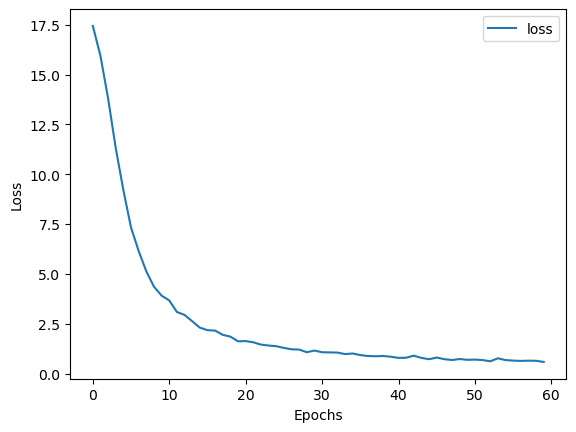

In [27]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

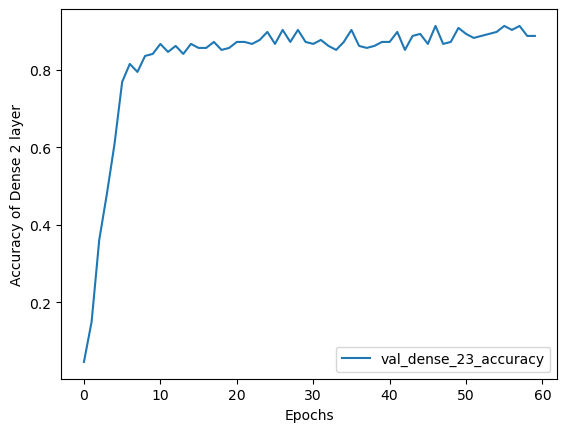

In [37]:
#graph of accuracy of dense_2 vs epochs
for label in ["val_dense_23_accuracy"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

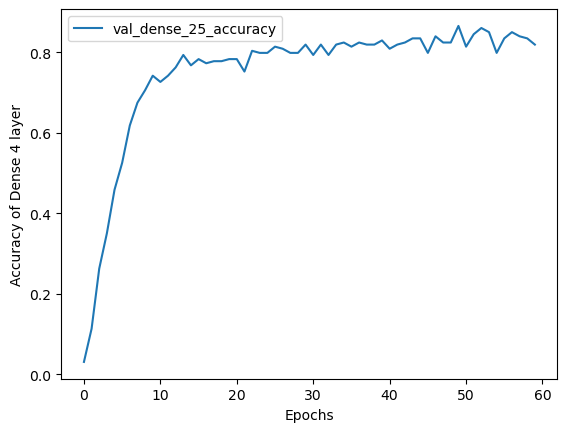

In [34]:
#graph of accuracy of dense_4 vs epochs
for label in ["val_dense_25_accuracy"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 4 layer")
plt.show()

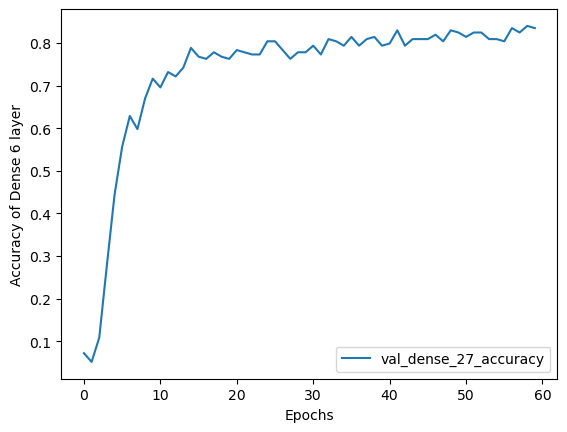

In [38]:
#graph of accuracy of dense_6 vs epochs
for label in ["val_dense_27_accuracy"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 6 layer")
plt.show()

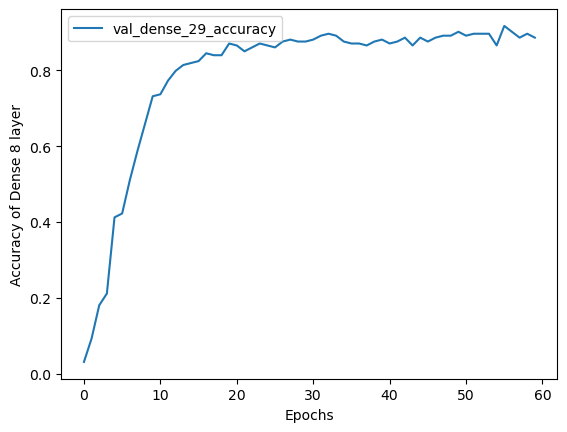

In [39]:
#graph of accuracy of dense_8 vs epochs
for label in ["val_dense_29_accuracy"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 8 layer")
plt.show()

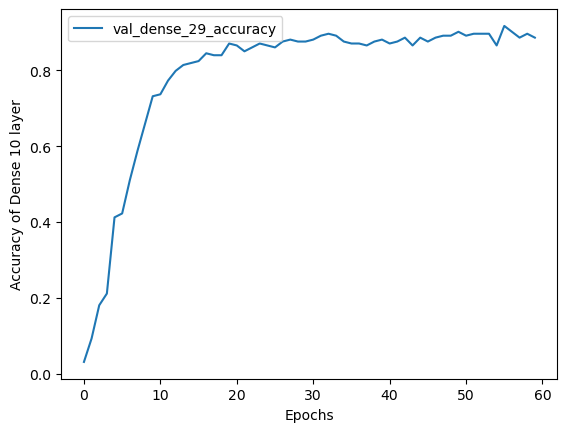

In [41]:
#graph of accuracy of dense_10 vs epochs
for label in ["val_dense_29_accuracy"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 10 layer")
plt.show()

In [42]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
print ("Loss on training set= " + str(preds[0]))

31/31 [==============================] - 1s 37ms/step - loss: 3.2304 - dense_21_loss: 2.6911 - dense_23_loss: 0.1166 - dense_25_loss: 0.1558 - dense_27_loss: 0.1682 - dense_29_loss: 0.0987 - dense_21_accuracy: 0.8010 - dense_23_accuracy: 0.9763 - dense_25_accuracy: 0.9629 - dense_27_accuracy: 0.9660 - dense_29_accuracy: 0.9763        
Loss on training set= 3.2303719520568848


In [43]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print ("Loss on testing set= " + str(preds[0]))

4/4 [==============================] - 0s 51ms/step - loss: 21.7094 - dense_21_loss: 20.1228 - dense_23_loss: 0.0262 - dense_25_loss: 0.6787 - dense_27_loss: 0.7457 - dense_29_loss: 0.1360 - dense_21_accuracy: 0.0000e+00 - dense_23_accuracy: 0.9900 - dense_25_accuracy: 0.8700 - dense_27_accuracy: 0.8600 - dense_29_accuracy: 0.9600
Loss on testing set= 21.709386825561523


In [44]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

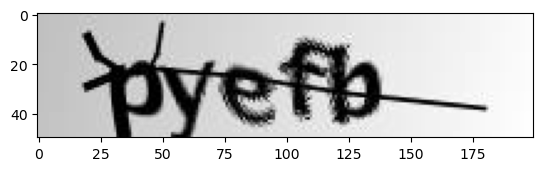

In [50]:
#Check model on samples
img=cv2.imread('captcha_dataset\samples\pyefb.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [49]:
print("Predicted Captcha =",predict('captcha_dataset\samples\pyefb.png'))

1/1 [==============================] - 0s 36ms/step
Predicted Captcha = myefb


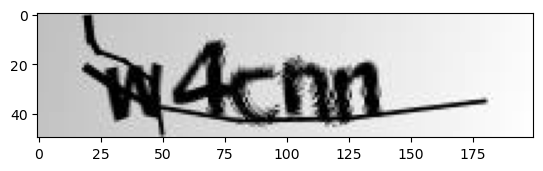

In [51]:
#Sample 2
img=cv2.imread('captcha_dataset\samples\w4cnn.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [52]:
print("Predicted Captcha =",predict('captcha_dataset\samples\w4cnn.png'))

1/1 [==============================] - 0s 49ms/step
Predicted Captcha = m4enn


In [15]:
import cv2
import numpy as np
imag_path = 'ocr.png'
img =  cv2.imread(imag_path)
img = img/255.0
img.shape
# reshape_img = np.reshape(img, (50, 200, 1))
50*200

10000

In [ ]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir("captcha_dataset\samples")):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join("captcha_dataset\samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = pic[:-4] # this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y